In [ ]:
import warnings
warnings.simplefilter("ignore")

import re
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import gensim  # https://pypi.org/project/gensim/
import nltk #https://www.nltk.org/
from nltk.sentiment import SentimentIntensityAnalyzer #https://www.nltk.org/api/nltk.sentiment.html
from textblob import TextBlob #https://textblob.readthedocs.io/en/dev/
from wordcloud import WordCloud, STOPWORDS #https://pypi.org/project/wordcloud/

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

import tensorflow as tf
import plotly.express as px

import gc

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
from keras.preprocessing.text import Tokenizer
#for confusion matrix
import seaborn
from sklearn.metrics import confusion_matrix
import keras

In [ ]:
original_data_link = "https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets"
labled_data_link_2 = "https://www.kaggle.com/datasets/trinhngocphap/covid19-vaccine-tweets-sentiment-10k" # label source unknown(0 = Negative, 1 = Neutral , 2 = Positive) # not so sure about these sentiments
labled_data_link_3 = "https://www.kaggle.com/datasets/datasciencetool/covid19-vaccine-tweets-with-sentiment-annotation" # manually labeled (Negative = 1, neutral = 2, positive = 3)

In [ ]:
!pip install opendatasets

import opendatasets as od
import pandas as pd
  
# kaggle name: nadaabbas
# kaggle key: 17ba9cecf27b2758154583bc6c69bcde

od.download(original_data_link)
od.download(labled_data_link_2)
od.download(labled_data_link_3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nadaabbas
Your Kaggle Key: ··········


100%|██████████| 29.9M/29.9M [00:02<00:00, 12.9MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nadaabbas
Your Kaggle Key: ··········


100%|██████████| 678k/678k [00:00<00:00, 848kB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

nadaabbas
Your Kaggle Key: ··········


100%|██████████| 568k/568k [00:00<00:00, 754kB/s]

In [ ]:
original_data_path = "/content/all-covid19-vaccines-tweets/vaccination_all_tweets.csv"
labled_data_path_2_train = "/content/covid19-vaccine-tweets-sentiment-10k/train_vaccine_tweet.csv"
labled_data_path_2_test = "/content/covid19-vaccine-tweets-sentiment-10k/test_vaccine_tweet.csv"
labled_data_path_3 = "/content/covid19-vaccine-tweets-with-sentiment-annotation/covid-19_vaccine_tweets_with_sentiment.csv"

In [ ]:
df_labled_2_train = pd.read_csv(labled_data_path_2_train)
df_labled_2_test = pd.read_csv(labled_data_path_2_test)
df_labled_3 = pd.read_csv(labled_data_path_3, encoding='latin')

df_unlabled = pd.read_csv(original_data_path)

# data investigation:
### 

In [ ]:
df_labled_2_train.head()
df_labled_2_train["sentiment"] = df_labled_2_train["sentiment"] +1
df_labled_2_train.head()

,text,sentiment
0,@latingle Too bad they didn't order #Moderna o...,1.0
1,Yes @DollyParton ❤️❤️❤️❤️🥰🥰🥰. AND THANK YOU! #...,3.0
2,I wish anyone taking the mRNA vaccines good lu...,3.0
3,@BBCWorld New crime against humanity :Israeli ...,1.0
4,@BDUTT #Covaxin airlifted?!? ?,2.0


In [ ]:
df_labled_2_test.head()
df_labled_2_test["sentiment"] = df_labled_2_test["sentiment"] +1
df_labled_2_test.head()


,text,sentiment
0,"#PfizerBioNTech #Tozinameran has 54,828 report...",1.0
1,Mom is doing panic buying whereas Dad panic se...,1.0
2,"Today is my birthday. For my gift my sons, mot...",2.0
3,#OMI Hospital Karachi is charging Rs 15000/-fo...,2.0
4,"Our beloved PM, Shri.Narendra Modi takes his 1...",3.0


In [ ]:
df_labled_3.drop("tweet_id", axis=1, inplace=True)
df_labled_3["text"] = df_labled_3["tweet_text"]
df_labled_3.drop("tweet_text", axis=1, inplace=True)
df_labled_3["sentiment"] = df_labled_3["label"]
df_labled_3.drop("label", axis=1, inplace=True)

df_labled_3.head()

,text,sentiment
0,"4,000 a day dying from the so called Covid-19 ...",1
1,Pranam message for today manifested in Dhyan b...,2
2,Hyderabad-based ?@BharatBiotech? has sought fu...,2
3,"Confirmation that Chinese #vaccines ""dont hav...",1
4,"Lab studies suggest #Pfizer, #Moderna vaccines...",3


In [ ]:
df_unlabled_text = pd.DataFrame({"text":df_unlabled["text"]})
df_unlabled_text.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
print(f'df_labled_2_train shape:',df_labled_2_train.shape)
print(f'df_labled_2_test shape:',df_labled_2_test.shape)
print(f'df_labled_3 shape:',df_labled_3.shape)
print(f'df_unlabled_text shape:',df_unlabled_text.shape)

df_labled_2_train shape: (9000, 2)
df_labled_2_test shape: (1000, 2)
df_labled_3 shape: (6000, 2)
df_unlabled_text shape: (228207, 1)


In [ ]:
import numpy as np

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
print("df_labled_2_train")
print(df_labled_2_train["sentiment"].unique())
missing_data(df_labled_2_train)

df_labled_2_train
[1. 3. 2.]


,text,sentiment
Total,0,0
Percent,0.0,0.0
Types,object,float64


In [ ]:
print("df_labled_2_test")
print(df_labled_2_test["sentiment"].unique())
missing_data(df_labled_2_test)

df_labled_2_test
[1. 2. 3.]


,text,sentiment
Total,0,0
Percent,0.0,0.0
Types,object,float64


In [ ]:
print("df_labled_3")
print(df_labled_3["sentiment"].unique())
missing_data(df_labled_3)

df_labled_3
[1 2 3]


,text,sentiment
Total,0,0
Percent,0.0,0.0
Types,object,int64


In [ ]:
print("df_unlabled_text")
missing_data(df_unlabled_text)

df_unlabled_text


,text
Total,0
Percent,0.0
Types,object


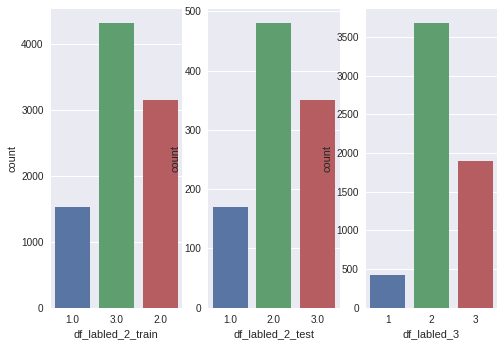

In [ ]:
figure, axis = plt.subplots(3, 1)

plt.subplot(131)
ax = sns.countplot(df_labled_2_train["sentiment"])
plt.xlabel('df_labled_2_train')
ax.set_xticklabels(df_labled_2_train["sentiment"].unique());

plt.subplot(132)
ax = sns.countplot(df_labled_2_test["sentiment"])
plt.xlabel('df_labled_2_test')
ax.set_xticklabels(df_labled_2_test["sentiment"].unique());

plt.subplot(133)
ax = sns.countplot(df_labled_3["sentiment"])
plt.xlabel('df_labled_3')
ax.set_xticklabels(df_labled_3["sentiment"].unique());

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

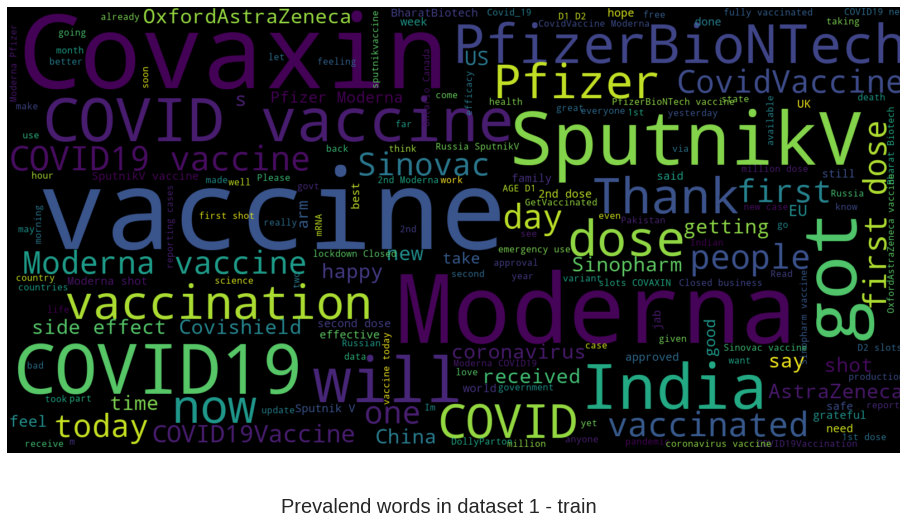

In [ ]:
show_wordcloud(df_labled_2_train['text'] , title = 'Prevalend words in dataset 1 - train')

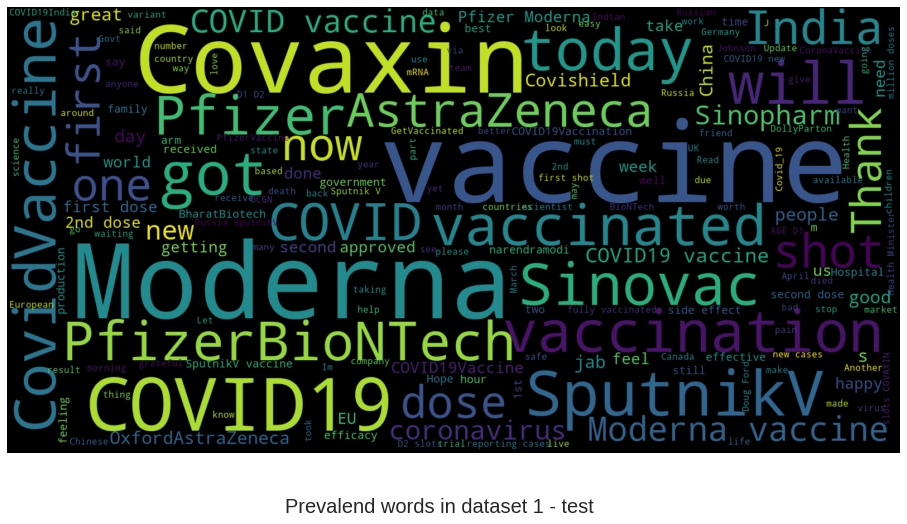

In [ ]:
show_wordcloud(df_labled_2_test['text'] , title = 'Prevalend words in dataset 1 - test')

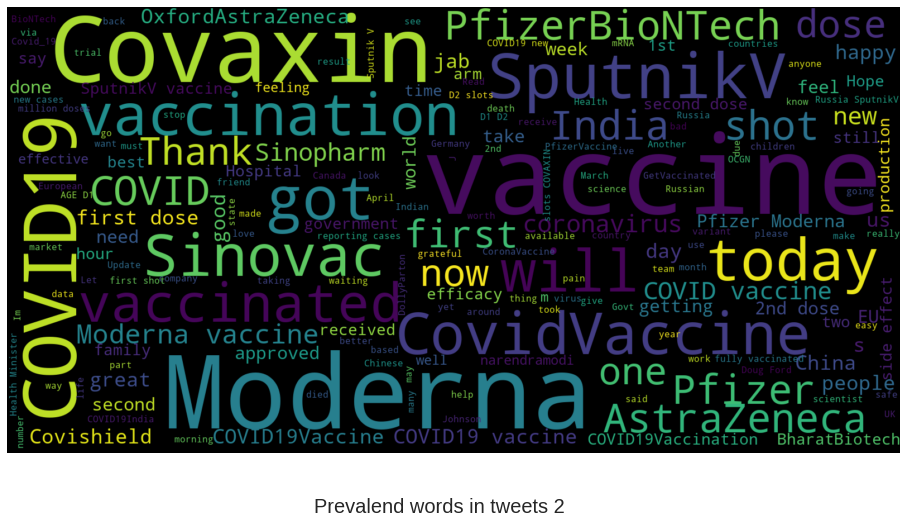

In [ ]:
show_wordcloud(df_labled_2_test['text'] , title = 'Prevalend words in tweets 2')

In [ ]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True, max_len= 30))


from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)


def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def get_sentiments(df):
  temp = []
  #Splitting pd.Series to list

  data_to_list_train_2 = df["text"].values.tolist()
  for i in range(len(data_to_list_train_2)):
      temp.append(depure_data(data_to_list_train_2[i]))
  print(list(temp[:1]))

  data_words = list(sent_to_words(temp))
  print(data_words[:1],'\n')

  data = []

  for i in range(len(data_words)):
      data.append(detokenize(data_words[i]))
  print(data[:1])

  data = np.array(data)
  #Create a sentiment column
  df["vader_pred_sentiment"] = np.nan

  predicted_sentiment = df['text'].apply(lambda x: find_sentiment(x))

  df["vader_pred_sentiment"] = predicted_sentiment.map({"Negative":1, "Neutral":2, "Positive":3})
  df["vader_pred_sentiment"]
  return df
  

def calculate_accuracy(df):
   correct = (df["vader_pred_sentiment"] == df["sentiment"])
   accuracy = correct.sum() / correct.size 
   return accuracy

In [ ]:
df_labled_2_train = get_sentiments(df_labled_2_train)
vader_accuracy_2_train = calculate_accuracy(df_labled_2_train)
vader_accuracy_2_train

['Too bad they didnt order #Moderna or #JohnsonAndJohnsonVaccine FFS! Incompetent noobs....this means my… ']
[['too', 'bad', 'they', 'didnt', 'order', 'moderna', 'or', 'johnsonandjohnsonvaccine', 'ffs', 'incompetent', 'noobs', 'this', 'means', 'my']] 

['too bad they didnt order moderna or johnsonandjohnsonvaccine ffs incompetent noobs this means my']


0.6494444444444445

In [ ]:
df_labled_2_test = get_sentiments(df_labled_2_test)
vader_accuracy_2_test = calculate_accuracy(df_labled_2_test)
vader_accuracy_2_test

['#PfizerBioNTech #Tozinameran has 54,828 reported adverse reactions, and at least 257 deaths (under Death category),… ']
[['pfizerbiontech', 'tozinameran', 'has', 'reported', 'adverse', 'reactions', 'and', 'at', 'least', 'deaths', 'under', 'death', 'category']] 

['pfizerbiontech tozinameran has reported adverse reactions and at least deaths under death category']


0.663

In [ ]:
df_labled_3 = get_sentiments(df_labled_3)
vader_accuracy_3 = calculate_accuracy(df_labled_3)
vader_accuracy_3

['4,000 a day dying from the so called Covid-19 \x93vaccine\x94 reports. #vaccine #PfizerVaccine #Moderna ']
[['day', 'dying', 'from', 'the', 'so', 'called', 'covid', 'vaccine', 'reports', 'vaccine', 'pfizervaccine', 'moderna']] 

['day dying from the so called covid vaccine reports vaccine pfizervaccine moderna']


0.4648333333333333

# Bert

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def split_to_batchs(df, n):
  batches = []
  for i in range(n):
    start_ind = i*250
    end_ind = start_ind+250
    batches.append(df.iloc[start_ind:end_ind])
  return batches

In [ ]:
df_labled_2_train_batches = split_to_batchs(df_labled_2_train, 36)
df_labled_2_test_batches = [df_labled_2_test]
df_labled_3_batches = split_to_batchs(df_labled_3, 24)

In [ ]:
def batch_tokenization(batches):
  tokens = []
  for batch in batches:
    res = batch["text"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
    tokens.append(res)
  return tokens

In [ ]:
tokenized_2_train_batches = batch_tokenization(df_labled_2_train_batches)
tokenized_2_test_batches = batch_tokenization(df_labled_2_test_batches)
tokenized_3_batches = batch_tokenization(df_labled_3_batches)

In [ ]:
def get_padded(tokenized):
  max_len = 0
  for i in tokenized.values:
      if len(i) > max_len:
          max_len = len(i)
  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
  return padded

In [ ]:
def get_padded_batches(token_batches):
  padded = []
  for batch in token_batches:
    padded.append(get_padded(batch))
  return padded

In [ ]:
padded_2_train_batches = get_padded_batches(tokenized_2_train_batches)
padded_2_test_batches = get_padded_batches(tokenized_2_test_batches)
padded_3_batches = get_padded_batches(tokenized_3_batches)

In [ ]:
def get_attention_mask_batches(padded_batches):
  attention_masks = []
  for batch in padded_batches:
    attention_masks.append(np.where(batch != 0, 1, 0))
  return attention_masks

In [ ]:
attention_mask_2_train_batches = get_attention_mask_batches(padded_2_train_batches)
attention_mask_2_test_batches = get_attention_mask_batches(padded_2_test_batches)
attention_mask_3_batches = get_attention_mask_batches(padded_3_batches)

In [ ]:
def get_features_bert(padded_batches, attention_mask_batches, df_batches):
  
  batches_features = []
  batches_labels = []
  i = 0
  for padded_batch, mask_batch, df in zip(padded_batches, attention_mask_batches, df_batches):
      input_ids = torch.tensor(padded_batch)
      attention_mask = torch.tensor(mask_batch)
      with torch.no_grad():
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

      features = last_hidden_states[0][:,0,:].numpy()
      labels = df["sentiment"]

      batches_features.append(features)
      batches_labels.append(labels)
      
      del features
      del labels

      print(f"Done with batch number:{i} #######################################")
      i+=1
      gc.collect()
  return batches_features, batches_labels


In [ ]:
def get_logistic_reg_predictions(padded_batches, attention_mask_batches, df_batches):
  #batch_scores = []

  batches_features, batches_labels = get_features_bert(padded_batches, attention_mask_batches, df_batches)
  #i = 0
  features_all = []
  labels_all = []
  for features, labels in zip(batches_features, batches_labels):
    for f, l in zip(features, labels):
      features_all.append(f)
      labels_all.append(l)

  del batches_features
  del batches_labels

  train_features, test_features, train_labels, test_labels = train_test_split(features_all, labels_all, test_size=0.25)
  lr_clf = LogisticRegression()
  lr_clf.fit(train_features, train_labels)
  preds = lr_clf.predict(features_all)
  test_score = lr_clf.score(test_features, test_labels)
  all_score = lr_clf.score(features_all, labels_all)
  
  print(f"test accuracy is: {test_score}")
  print(f"all accuracy is: {all_score}")

  #i+=1
  return test_score, all_score, preds #batch_scores

In [ ]:
bert_test_accuracy_2_train, bert_all_accuracy_2_train, bert_predictions_2_train = get_logistic_reg_predictions(padded_2_train_batches, attention_mask_2_train_batches, df_labled_2_train_batches)

Done with batch number:0 #######################################
Done with batch number:1 #######################################
Done with batch number:2 #######################################
Done with batch number:3 #######################################
Done with batch number:4 #######################################
Done with batch number:5 #######################################
Done with batch number:6 #######################################
Done with batch number:7 #######################################
Done with batch number:8 #######################################
Done with batch number:9 #######################################
Done with batch number:10 #######################################
Done with batch number:11 #######################################
Done with batch number:12 #######################################
Done with batch number:13 #######################################
Done with batch number:14 #######################################
Done with batch numb

In [ ]:
gc.collect(generation=2)

In [ ]:
bert_test_accuracy_2_test, bert_all_accuracy_2_test, bert_predictions_2_test = get_logistic_reg_predictions(padded_2_test_batches, attention_mask_2_test_batches, df_labled_2_test_batches)

Done with batch number:0 #######################################
test accuracy is: 0.684
all accuracy is: 0.856


In [ ]:
gc.collect(generation=2)

53

In [ ]:
bert_test_accuracy_3, bert_all_accuracy_3, bert_predictions_3 = get_logistic_reg_predictions(padded_3_batches, attention_mask_3_batches, df_labled_3_batches)

Done with batch number:0 #######################################
Done with batch number:1 #######################################
Done with batch number:2 #######################################
Done with batch number:3 #######################################
Done with batch number:4 #######################################
Done with batch number:5 #######################################
Done with batch number:6 #######################################
Done with batch number:7 #######################################
Done with batch number:8 #######################################
Done with batch number:9 #######################################
Done with batch number:10 #######################################
Done with batch number:11 #######################################
Done with batch number:12 #######################################
Done with batch number:13 #######################################
Done with batch number:14 #######################################
Done with batch numb

In [ ]:
df_labled_2_train["bert_wLR_pred_sentiment"] = bert_predictions_2_train
df_labled_2_test["bert_wLR_pred_sentiment"] = bert_predictions_2_test
df_labled_3["bert_wLR_pred_sentiment"] = bert_predictions_3

In [ ]:
datasets = ["dataset 1 - train", "dataset 1 - train", "dataset 2"]
numb_of_texts = [len(df_labled_2_train), len(df_labled_2_test), len(df_labled_3)]
vader_accuracies = [vader_accuracy_2_train ,vader_accuracy_2_test ,vader_accuracy_3]
test_size = [len(df_labled_2_train)*0.25, len(df_labled_2_test)*0.25, len(df_labled_3)*0.25]
bert_test_accuracies = [bert_test_accuracy_2_train, bert_test_accuracy_2_test, bert_test_accuracy_3]
bert_all_accuracies = [bert_all_accuracy_2_train, bert_all_accuracy_2_test, bert_all_accuracy_3]

In [ ]:
# (Negative = 1, neutral = 2, positive = 3)

original_counts1 = df_labled_2_train["sentiment"].value_counts()
original_counts2 = df_labled_2_test["sentiment"].value_counts()
original_counts3 = df_labled_3["sentiment"].value_counts()

Negative = [original_counts1[1], original_counts2[1], original_counts3[1]]
Neutral = [original_counts1[2], original_counts2[2], original_counts3[2]]
Positive = [original_counts1[3], original_counts2[3], original_counts3[3]]

results = pd.DataFrame({
    "datasets":datasets,
     "numb_of_texts": numb_of_texts, 
     "true_labels_count:Negative": Negative,
     "true_labels_count:Neutral": Neutral, 
     "true_labels_count:Positive": Positive, 
     "vader_accuracies": vader_accuracies,
     "test_size":test_size, 
     "bert_test_accuracies":bert_test_accuracies, 
     "bert_all_accuracies":bert_all_accuracies})
results

,datasets,numb_of_texts,true_labels_count:Negative,true_labels_count:Neutral,true_labels_count:Positive,vader_accuracies,test_size,bert_test_accuracies,bert_all_accuracies
0,dataset 1,9000,1530,4320,3150,0.649444,2250.0,0.752889,0.785889
1,dataset 2,1000,170,480,350,0.663000,250.0,0.684000,0.856000
2,dataset 3,6000,420,3680,1900,0.464833,1500.0,0.742667,0.771333


In [ ]:
def get_TP_perc(df, label):
  count_res = (df["vader_pred_sentiment"]==label)*(df["sentiment"]==label)
  TP_count = (count_res[count_res==True]).count()

  return TP_count*100/df["sentiment"].value_counts()[label]

def get_TP_perc_bert(df, label):
  count_res = (df["bert_wLR_pred_sentiment"]==label)*(df["sentiment"]==label)
  TP_count = (count_res[count_res==True]).count()

  return TP_count*100/df["sentiment"].value_counts()[label]

In [ ]:
TP_Neg_1 = get_TP_perc(df_labled_2_train,1)
TP_Neut_1 = get_TP_perc(df_labled_2_train,2)
TP_pos_1 = get_TP_perc(df_labled_2_train,3)

TP_Neg_2 = get_TP_perc(df_labled_2_test,1)
TP_Neut_2 = get_TP_perc(df_labled_2_test,2)
TP_pos_2 = get_TP_perc(df_labled_2_test,3)

TP_Neg_3 = get_TP_perc(df_labled_3,1)
TP_Neut_3 = get_TP_perc(df_labled_3,2)
TP_pos_3 = get_TP_perc(df_labled_3,3)

TP_Neg_Vader = [f"{round(TP_Neg_1,2)}%", f"{round(TP_Neg_2,2)}%", f"{round(TP_Neg_3,2)}%"]
TP_Neut_Vader = [f"{round(TP_Neut_1,2)}%", f"{round(TP_Neut_2,2)}%", f"{round(TP_Neut_3,2)}%"]
TP_Pos_Vader = [f"{round(TP_pos_1,2)}%", f"{round(TP_pos_2,2)}%", f"{round(TP_pos_3)}%"]

In [ ]:
TP_Neg_1 = get_TP_perc_bert(df_labled_2_train,1)
TP_Neut_1 = get_TP_perc_bert(df_labled_2_train,2)
TP_pos_1 = get_TP_perc_bert(df_labled_2_train,3)

TP_Neg_2 = get_TP_perc_bert(df_labled_2_test,1)
TP_Neut_2 = get_TP_perc_bert(df_labled_2_test,2)
TP_pos_2 = get_TP_perc_bert(df_labled_2_test,3)

TP_Neg_3 = get_TP_perc_bert(df_labled_3,1)
TP_Neut_3 = get_TP_perc_bert(df_labled_3,2)
TP_pos_3 = get_TP_perc_bert(df_labled_3,3)

TP_Neg_Bert_wLR = [f"{round(TP_Neg_1,2)}%", f"{round(TP_Neg_2,2)}%", f"{round(TP_Neg_3,2)}%"]
TP_Neut_Bert_wLR = [f"{round(TP_Neut_1,2)}%", f"{round(TP_Neut_2,2)}%", f"{round(TP_Neut_3,2)}%"]
TP_Pos_Bert_wLR = [f"{round(TP_pos_1,2)}%", f"{round(TP_pos_2,2)}%", f"{round(TP_pos_3)}%"]

In [ ]:
results = pd.DataFrame({
    "datasets":datasets,
    "texts_count": numb_of_texts,
    "Negative_count": Negative,
    "Neutral_count": Neutral,
    "Positive_count": Positive,
    "TP_Neg_Vader": TP_Neg_Vader,
    "TP_Neut_Vader": TP_Neut_Vader,
    "TP_Pos_Vader": TP_Pos_Vader,
    "TP_Neg_Bert_wLR": TP_Neg_Bert_wLR,
    "TP_Neut_Bert_wLR": TP_Neut_Bert_wLR,
    "TP_Pos_Bert_wLR": TP_Pos_Bert_wLR,
    "vader_acc": vader_accuracies,
    "test_size":test_size, 
    "bert_test_acc":bert_test_accuracies, 
    "bert_all_acc":bert_all_accuracies})
results

,datasets,texts_count,Negative_count,Neutral_count,Positive_count,TP_Neg_Vader,TP_Neut_Vader,TP_Pos_Vader,TP_Neg_Bert_wLR,TP_Neut_Bert_wLR,TP_Pos_Bert_wLR,vader_acc,test_size,bert_test_acc,bert_all_acc
0,dataset 1,9000,1530,4320,3150,84.97%,52.41%,72.41%,73.27%,82.66%,75.59%,0.649444,2250.0,0.752889,0.785889
1,dataset 2,1000,170,480,350,88.24%,52.5%,74.57%,84.71%,89.17%,81.14%,0.663000,250.0,0.684000,0.856000
2,dataset 3,6000,420,3680,1900,53.33%,38.61%,60%,30.24%,87.93%,67%,0.464833,1500.0,0.742667,0.771333


In [ ]:
results.to_csv('comparison_1_results.csv')
results.to_csv('comparison_1_results_h.csv', header=True, index=False)